In [114]:
# -*- coding: utf-8 -*- 
# This code is written in Python 3.7. To install the required packages, run the following commands:
# pip install pandas numpy matplotlib seaborn scikit-learn sympy
# This code is applicable to the CICIDS2017 dataset. 
# implemented Decision Tree Classifier. 


import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, precision_recall_curve
from sklearn.metrics import confusion_matrix
import seaborn as sns

from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    log_loss,
)
# Load the dataset
df = pd.read_csv('/home/ibibers@ads.iu.edu/IDS_Datasets/Combined_datasets/CICIDS2017_combined_dataset.csv')

# Drop duplicates: same observation but multiple occurences
main_df_1 = df.drop_duplicates(keep='first')

# Drop columns that have just one unique value, the model wont learn form columns like this.
one_value = main_df_1.columns[main_df_1.nunique() == 1]
main_df_2 = main_df_1.drop(columns = one_value, axis=1)

# Fill nan values
main_df_2['Flow Bytes/s'] = main_df_2['Flow Bytes/s'].fillna(main_df_2['Flow Bytes/s'].mean())

# Remove leading space character in all feature names
main_df_2.rename(columns=lambda x: x.lstrip(), inplace=True)

sample_df_1 = main_df_2.copy()
# Extract subsample of data
print (" Extract subsample of data: ")
print (sample_df_1['Label'].value_counts())


 Extract subsample of data: 
Label
BENIGN                        2096484
DoS Hulk                       172849
DDoS                           128016
PortScan                        90819
DoS GoldenEye                   10286
FTP-Patator                      5933
DoS slowloris                    5385
DoS Slowhttptest                 5228
SSH-Patator                      3219
Bot                              1953
Web Attack � Brute Force         1470
Web Attack � XSS                  652
Infiltration                       36
Web Attack � Sql Injection         21
Heartbleed                         11
Name: count, dtype: int64


In [115]:
# Label encoding to convert categorical data to numerical data
le = LabelEncoder()
sample_df_1['Label'] = le.fit_transform(sample_df_1['Label'])


In [116]:

dropped_df = ['Label', 'Flow Packets/s', 'Flow Bytes/s']
X = sample_df_1.drop( dropped_df, axis=1) 
y = sample_df_1['Label']  


In [117]:
# Initial train test split set and split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


# ------------------------------ IG top 5 and 10 features --------------------------------
IGtop_5_features = ['Average Packet Size', 'Packet Length Mean', 'Packet Length Std', 
                  'Packet Length Variance', 'Total Length of Bwd Packets']

IGtop_10_features = ['Average Packet Size', 'Packet Length Mean', 'Packet Length Std', 
                   'Packet Length Variance', 'Total Length of Bwd Packets', 
                   'Subflow Bwd Bytes', 'Avg Bwd Segment Size', 'Bwd Packet Length Mean', 
                   'Total Length of Fwd Packets', 'Subflow Fwd Bytes']


X_train_top5 = X_train[IGtop_5_features]
X_test_top5 = X_test[IGtop_5_features]

X_train_top10 = X_train[IGtop_10_features]
X_test_top10 = X_test[IGtop_10_features]

# ------------------------------ Kbest top 5 and 10 features --------------------------------
Kbesttop_5_features = ['Bwd Packet Length Max', 'Bwd Packet Length Mean', 'Bwd Packet Length Std', 
                        'Flow IAT Max', 'Fwd IAT Std']

kbesttop_10_features = ['Bwd Packet Length Max', 'Bwd Packet Length Mean', 'Bwd Packet Length Std', 
                        'Flow IAT Max', 'Fwd IAT Std', 'Fwd IAT Max', 'Max Packet Length', 
                        'Packet Length Mean', 'Packet Length Std', 'Packet Length Variance']

Kbest_X_train_top5 = X_train[Kbesttop_5_features]
Kbest_X_test_top5 = X_test[Kbesttop_5_features]

Kbest_X_train_top10 = X_train[kbesttop_10_features]
Kbest_X_test_top10 = X_test[kbesttop_10_features]






In [118]:
def evaluate_model(y_true, y_pred, model_name):
    """Calculate and return performance metrics as floating-point numbers."""
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')

    print(f"\n{model_name} Metrics:")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")

    return {
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
    }

In [119]:
# ----------------------------------------- Decision Tree Classifier for All Features -----------------------------------------
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
y_pred_all = dt_model.predict(X_test)

In [120]:

accuracy_all = accuracy_score(y_test, y_pred_all)
print(f"Accuracy for All Features:" , accuracy_all)
print("\nClassification Report for All Features:")
print(classification_report(y_test, y_pred_all, target_names=le.classes_))


Accuracy for All Features: 0.998114864422873

Classification Report for All Features:
                            precision    recall  f1-score   support

                    BENIGN       1.00      1.00      1.00    419297
                       Bot       0.83      0.84      0.84       391
                      DDoS       1.00      1.00      1.00     25603
             DoS GoldenEye       1.00      0.99      0.99      2057
                  DoS Hulk       1.00      1.00      1.00     34570
          DoS Slowhttptest       0.98      0.99      0.99      1046
             DoS slowloris       0.99      0.99      0.99      1077
               FTP-Patator       1.00      1.00      1.00      1187
                Heartbleed       0.50      1.00      0.67         2
              Infiltration       0.75      0.86      0.80         7
                  PortScan       0.99      0.98      0.99     18164
               SSH-Patator       1.00      1.00      1.00       644
  Web Attack � Brute Force   

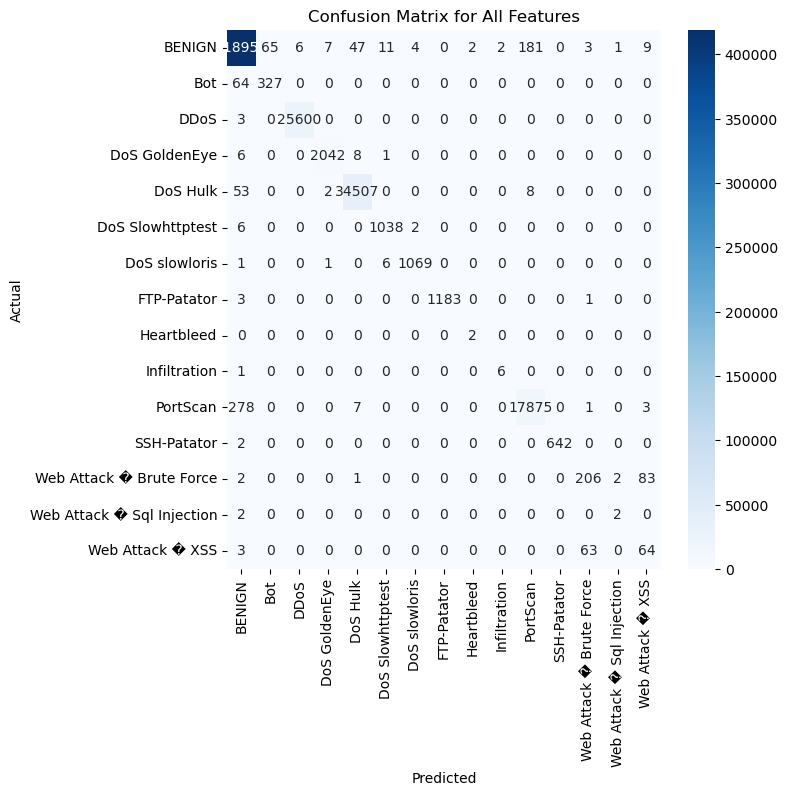

In [122]:

# Confusion matrix
conf_mat_all = confusion_matrix(y_test, y_pred_all)

# Plot confusion matrix
plt.figure(figsize=(7, 7))
sns.heatmap(conf_mat_all, annot=True, fmt="d", cmap="Blues", xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix for All Features")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [123]:
# Evaluate the model
metrics_all = evaluate_model(y_test, y_pred_all, "Decision Tree (All Features)")
print(metrics_all)


Decision Tree (All Features) Metrics:
Accuracy: 0.998114864422873
Precision: 0.9981417353393107
Recall: 0.998114864422873
F1 Score: 0.9981258455514226
{'Model': 'Decision Tree (All Features)', 'Accuracy': 0.998114864422873, 'Precision': 0.9981417353393107, 'Recall': 0.998114864422873, 'F1 Score': 0.9981258455514226}


In [124]:
# ----------------------------------------- Decision Tree Classifier for Top 5 Features -----------------------------------------
dt_model_top5 = DecisionTreeClassifier()
dt_model_top5.fit(X_train_top5, y_train)
y_pred_top5 = dt_model_top5.predict(X_test_top5)

In [125]:

accuracy_top5 = accuracy_score(y_test, y_pred_top5)
print("Accuracy for Top 5 Features:", accuracy_top5)
print("\nClassification Report for Top 5 Features:")
print(classification_report(y_test, y_pred_top5, target_names=le.classes_))


Accuracy for Top 5 Features: 0.9895475079934902

Classification Report for Top 5 Features:


/home/ibibers/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ibibers/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                            precision    recall  f1-score   support

                    BENIGN       0.99      1.00      0.99    419297
                       Bot       0.98      0.39      0.56       391
                      DDoS       1.00      1.00      1.00     25603
             DoS GoldenEye       0.99      0.74      0.85      2057
                  DoS Hulk       1.00      0.93      0.96     34570
          DoS Slowhttptest       0.99      0.45      0.62      1046
             DoS slowloris       0.99      0.70      0.82      1077
               FTP-Patator       0.99      0.98      0.99      1187
                Heartbleed       1.00      1.00      1.00         2
              Infiltration       0.25      0.29      0.27         7
                  PortScan       0.98      0.99      0.99     18164
               SSH-Patator       0.99      0.92      0.96       644
  Web Attack � Brute Force       0.96      0.09      0.17       294
Web Attack � Sql Injection       0.00      0.00

/home/ibibers/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


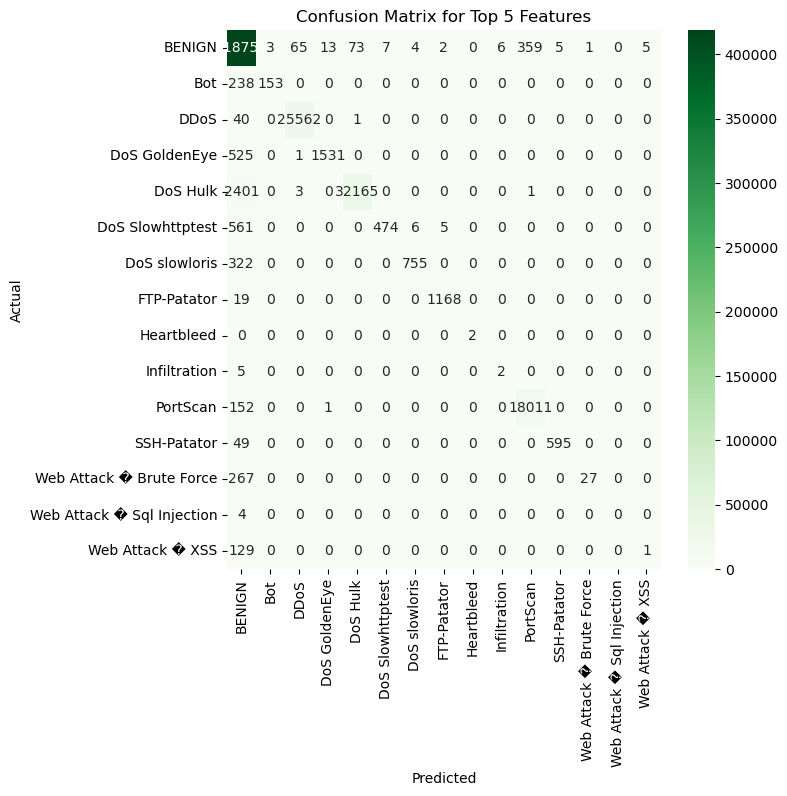

In [126]:

# Confusion matrix
conf_mat_top5 = confusion_matrix(y_test, y_pred_top5)

# Plot confusion matrix
plt.figure(figsize=(7, 7))
sns.heatmap(conf_mat_top5, annot=True, fmt="d", cmap="Greens", xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix for Top 5 Features")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [127]:
# Evaluate the model
metrics_top5 = evaluate_model(y_test, y_pred_top5, "Decision Tree (Top 5 Features)")
print(metrics_top5)



Decision Tree (Top 5 Features) Metrics:
Accuracy: 0.9895475079934902
Precision: 0.9893635330221364
Recall: 0.9895475079934902
F1 Score: 0.9886979372579044
{'Model': 'Decision Tree (Top 5 Features)', 'Accuracy': 0.9895475079934902, 'Precision': 0.9893635330221364, 'Recall': 0.9895475079934902, 'F1 Score': 0.9886979372579044}


/home/ibibers/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [128]:
# ----------------------------------------- Decision Tree Classifier for Top 10 Features -----------------------------------------
dt_model_top10 = DecisionTreeClassifier()

dt_model_top10.fit(X_train_top10, y_train)

y_pred_top10 = dt_model_top10.predict(X_test_top10)


In [129]:

accuracy_top10 = accuracy_score(y_test, y_pred_top10)
print(f"Accuracy for Top 10 Features: {accuracy_top10}")
print("\nClassification Report for Top 10 Features:")
print(classification_report(y_test, y_pred_top10, target_names=le.classes_))


Accuracy for Top 10 Features: 0.9896149050593391

Classification Report for Top 10 Features:


/home/ibibers/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ibibers/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                            precision    recall  f1-score   support

                    BENIGN       0.99      1.00      0.99    419297
                       Bot       0.99      0.39      0.56       391
                      DDoS       1.00      1.00      1.00     25603
             DoS GoldenEye       0.99      0.74      0.85      2057
                  DoS Hulk       1.00      0.93      0.96     34570
          DoS Slowhttptest       0.97      0.46      0.62      1046
             DoS slowloris       0.98      0.70      0.82      1077
               FTP-Patator       0.99      0.98      0.99      1187
                Heartbleed       1.00      1.00      1.00         2
              Infiltration       0.83      0.71      0.77         7
                  PortScan       0.98      0.99      0.99     18164
               SSH-Patator       0.99      0.93      0.96       644
  Web Attack � Brute Force       0.93      0.10      0.17       294
Web Attack � Sql Injection       0.00      0.00

/home/ibibers/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


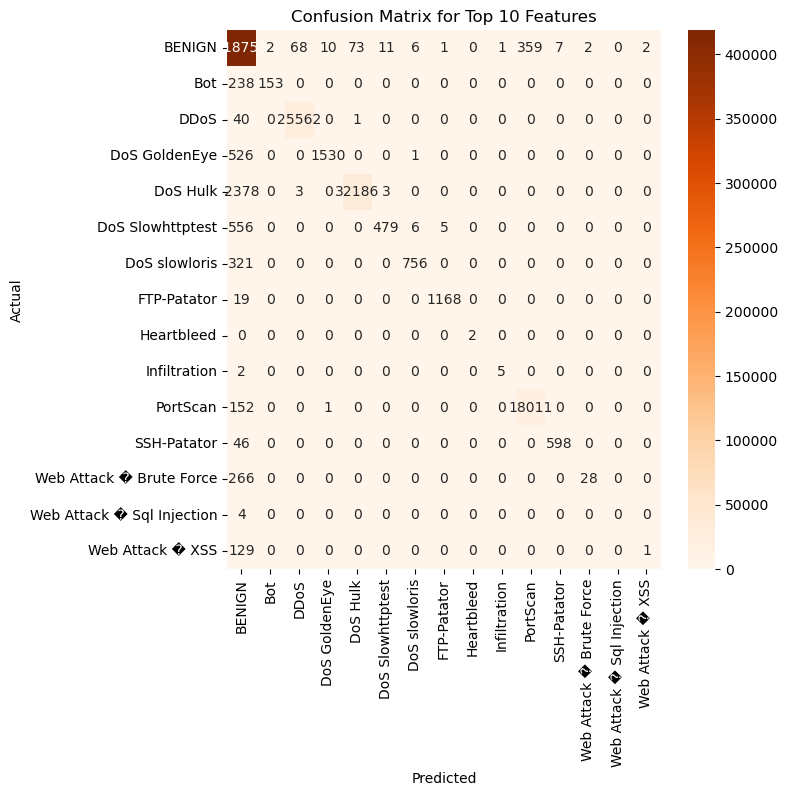

In [130]:

# Confusion matrix
conf_mat_top10 = confusion_matrix(y_test, y_pred_top10)

# Plot confusion matrix
plt.figure(figsize=(7, 7))
sns.heatmap(conf_mat_top10, annot=True, fmt="d", cmap="Oranges", xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix for Top 10 Features")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [131]:
# Evaluate the model
metrics_top10 = evaluate_model(y_test, y_pred_top10, "Decision Tree (Top 10 Features)")
print(metrics_top10)


Decision Tree (Top 10 Features) Metrics:
Accuracy: 0.9896149050593391
Precision: 0.9894362888197359
Recall: 0.9896149050593391
F1 Score: 0.9887711811928565
{'Model': 'Decision Tree (Top 10 Features)', 'Accuracy': 0.9896149050593391, 'Precision': 0.9894362888197359, 'Recall': 0.9896149050593391, 'F1 Score': 0.9887711811928565}


/home/ibibers/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [132]:

# ----------------------------------------- The summary Metrics for All Models -----------------------------------------
summary = pd.DataFrame([metrics_all, metrics_top5, metrics_top10])
print("\nSummary of Results:")
print(summary)

# Save summary to CSV
summary.to_csv("model_evaluation_summary.csv", index=False)



Summary of Results:
                             Model  Accuracy  Precision    Recall  F1 Score
0     Decision Tree (All Features)  0.998115   0.998142  0.998115  0.998126
1   Decision Tree (Top 5 Features)  0.989548   0.989364  0.989548  0.988698
2  Decision Tree (Top 10 Features)  0.989615   0.989436  0.989615  0.988771


In [6]:
#The new code from here -*- coding: utf-8 -*-
# This code is written in Python 3.7. Install the required packages using:
# pip install pandas numpy matplotlib seaborn scikit-learn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    precision_score,
    recall_score,
    f1_score
)
from sklearn.preprocessing import LabelEncoder
import time



# ---------------------------- Helper Functions ----------------------------
def evaluate_model(y_true, y_pred, model_name):
    """Calculate and return performance metrics."""
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')

    print(f"\n{model_name} Metrics:")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")

    return {
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
    }


def plot_confusion_matrix(y_true, y_pred, classes, title):
    """Plot and display a confusion matrix."""
    conf_matrix = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(7, 7))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
    plt.title(title)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()



In [7]:

# ---------------------------- Data Preprocessing ----------------------------

df = pd.read_csv('/home/ibibers@ads.iu.edu/IDS_Datasets/Combined_datasets/CICIDS2017_combined_dataset.csv')

df = df.drop_duplicates()
df.rename(columns=lambda x: x.lstrip(), inplace=True)
df['Flow Bytes/s'] = df['Flow Bytes/s'].fillna(df['Flow Bytes/s'].mean())

le = LabelEncoder()
df['Label'] = le.fit_transform(df['Label'])

dropped_cols = ['Label', 'Flow Packets/s', 'Flow Bytes/s']
X = df.drop(columns=dropped_cols, axis=1)
y = df['Label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [ ]:

# ---------------------------- Feature Selection ----------------------------
# Top features selected using Information Gain
IGtop_5_features = ['Average Packet Size', 'Packet Length Mean', 'Packet Length Std', 'Packet Length Variance', 'Total Length of Bwd Packets']
IGtop_10_features = IGtop_5_features + ['Subflow Bwd Bytes', 'Avg Bwd Segment Size', 'Bwd Packet Length Mean', 'Total Length of Fwd Packets', 'Subflow Fwd Bytes']

# Top features selected using K-best
Kbest_top_5_features = ['Bwd Packet Length Max', 'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow IAT Max', 'Fwd IAT Std']
Kbest_top_10_features = Kbest_top_5_features + ['Fwd IAT Max', 'Max Packet Length', 'Packet Length Mean', 'Packet Length Std', 'Packet Length Variance']

# Subset data based on the type of features 
datasets = {
    "All Features": (X_train, X_test),
    "IG Top 5 Features": (X_train[IGtop_5_features], X_test[IGtop_5_features]),
    "IG Top 10 Features": (X_train[IGtop_10_features], X_test[IGtop_10_features]),
    "KBest Top 5 Features": (X_train[Kbest_top_5_features], X_test[Kbest_top_5_features]),
    "KBest Top 10 Features": (X_train[Kbest_top_10_features], X_test[Kbest_top_10_features]),
}



----- Training Decision Tree Classifier for All Features -----

Decision Tree (All Features) Metrics:
Accuracy: 0.9981168466895156
Precision: 0.9981376522290754
Recall: 0.9981168466895156
F1 Score: 0.9981255829856895


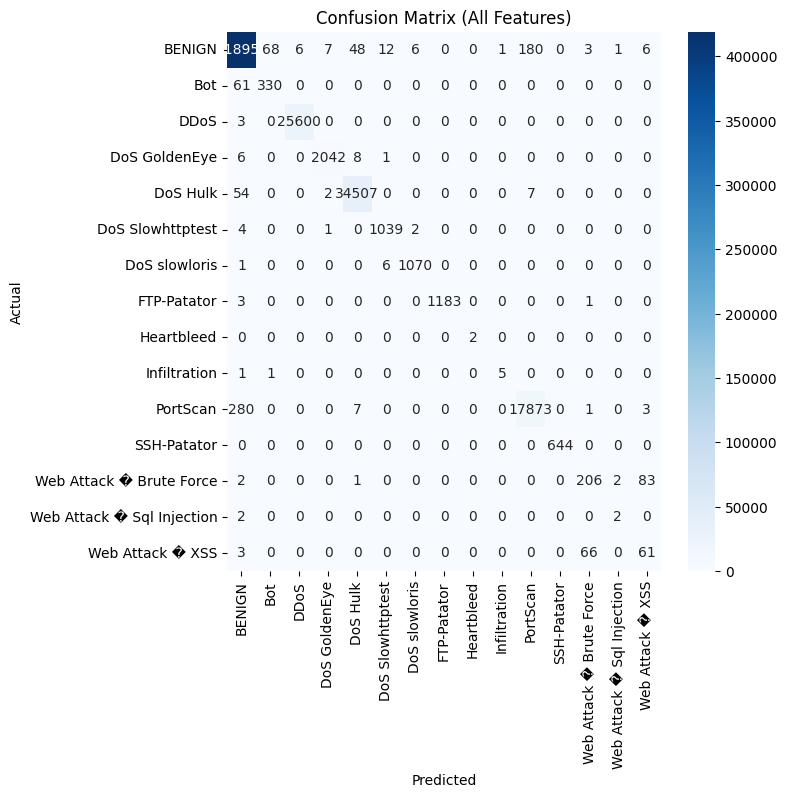


----- Training Decision Tree Classifier for IG Top 5 Features -----


/home/ibibers/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Decision Tree (IG Top 5 Features) Metrics:
Accuracy: 0.9895356143936346
Precision: 0.989346206754434
Recall: 0.9895356143936346
F1 Score: 0.9886819142560579


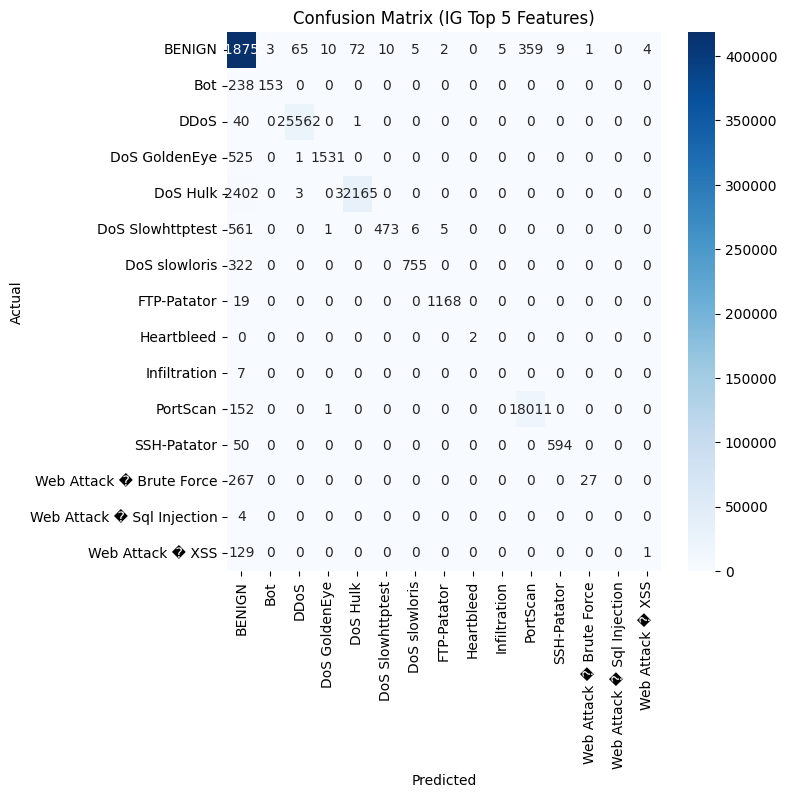


----- Training Decision Tree Classifier for IG Top 10 Features -----


/home/ibibers/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Decision Tree (IG Top 10 Features) Metrics:
Accuracy: 0.9896109405260539
Precision: 0.9894799354200723
Recall: 0.9896109405260539
F1 Score: 0.9887655125599497


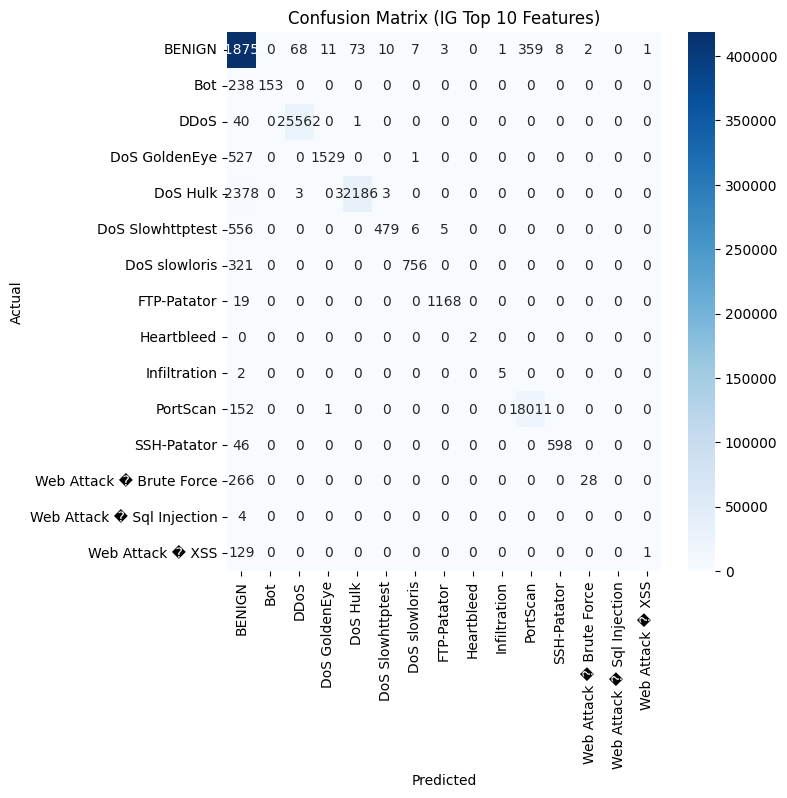


----- Training Decision Tree Classifier for KBest Top 5 Features -----


/home/ibibers/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Decision Tree (KBest Top 5 Features) Metrics:
Accuracy: 0.962192228325401
Precision: 0.9607517447546421
Recall: 0.962192228325401
F1 Score: 0.9613005138714802


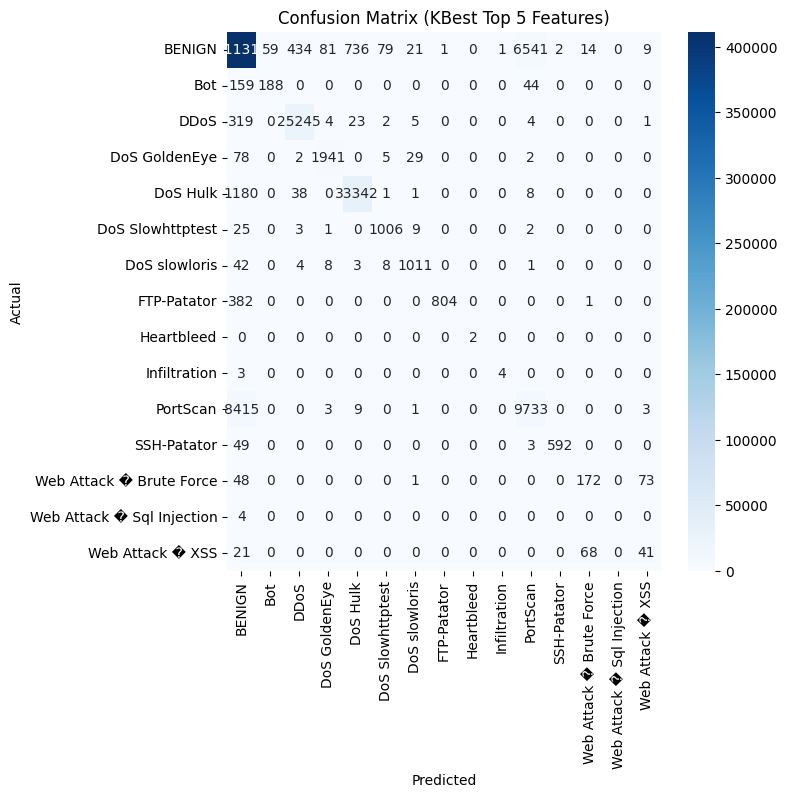


----- Training Decision Tree Classifier for KBest Top 10 Features -----

Decision Tree (KBest Top 10 Features) Metrics:
Accuracy: 0.9962376579123164
Precision: 0.996169574264078
Recall: 0.9962376579123164
F1 Score: 0.9961711783198194


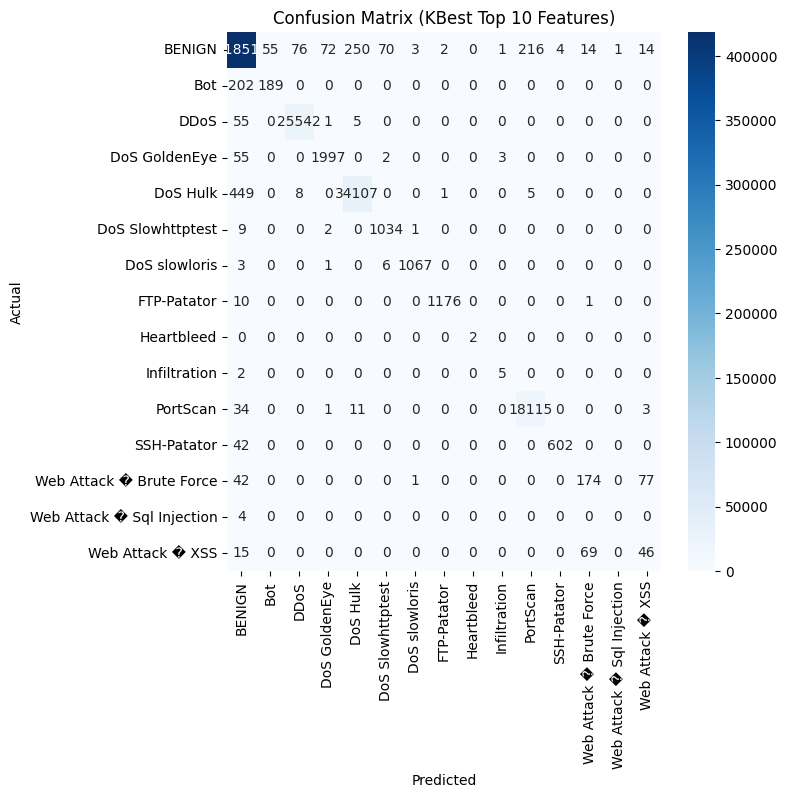

In [9]:

# ---------------------------- Model Training and Evaluation ----------------------------
results = []
for name, (X_tr, X_te) in datasets.items():
    print(f"\n----- Training Decision Tree Classifier for {name} -----")
    start_time = time.time()
    
    model = DecisionTreeClassifier()
    model.fit(X_tr, y_train)
    train_end_time = time.time()

    y_pred = model.predict(X_te)
  
    pred_end_time = time.time()

   
    metrics = evaluate_model(y_test, y_pred, f"Decision Tree ({name})")
    metrics['Training Time (s)'] = train_end_time - start_time
    metrics['Prediction Time (s)'] = pred_end_time - train_end_time
    metrics['Total Time (s)'] = pred_end_time - start_time
    results.append(metrics)


    plot_confusion_matrix(y_test, y_pred, le.classes_, f"Confusion Matrix ({name})")


In [10]:

# ---------------------------- Summary and Save Results ----------------------------
summary = pd.DataFrame(results)
print("\nSummary of Results:")
print(summary)

summary.to_csv("model_evaluation_summary.csv", index=False)



Summary of Results:
                                   Model  Accuracy  Precision    Recall  \
0           Decision Tree (All Features)  0.998117   0.998138  0.998117   
1      Decision Tree (IG Top 5 Features)  0.989536   0.989346  0.989536   
2     Decision Tree (IG Top 10 Features)  0.989611   0.989480  0.989611   
3   Decision Tree (KBest Top 5 Features)  0.962192   0.960752  0.962192   
4  Decision Tree (KBest Top 10 Features)  0.996238   0.996170  0.996238   

   F1 Score  Training Time (s)  Prediction Time (s)  Total Time (s)  
0  0.998126         164.565010             0.198570      164.763580  
1  0.988682           9.050984             0.036660        9.087645  
2  0.988766          16.961027             0.044626       17.005653  
3  0.961301           9.583585             0.051963        9.635547  
4  0.996171          25.046027             0.056885       25.102912  
